# DAI-101 | Assignment-1 | Exploratory Data Analysis of Customer Dataset
### Name: Suyash Rahul
### Enrollment No: 23123043
### Branch: Engineering Physics

## Assignment Objective

Perform an explorative analysis of a dataset of your choice from the Kaggle library
(https://www.kaggle.com/datasets). The analysis should be a mix of calculating relevant statistical measures, plotting, and drawing applicable conclusions using both numerical and categorical variables.
The analysis should be performed in two steps:

*   Univariate Analysis
*   Multivariate Analysis
* Statistical Analysis

## Dataset Description

The dataset used for exploratory data analysis is "Customer Dataset for Beginners." It contains 50 records with 5 variables: age, gender, review, education, and purchase decision.

## Dataset Source

The "Customer Dataset for Beginners" has been taken from Kaggle.

## Importing Packages, Loading Dataset & Basic Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('customer dataset.csv')

In [5]:
print("Dataset Preview:")
df.head()

Dataset Preview:


,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [8]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        50 non-null     int64 
 1   gender     50 non-null     object
 2   review     50 non-null     object
 3   education  50 non-null     object
 4   purchased  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [10]:
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,age
count,50.000000
mean,54.160000
std,25.658161
min,15.000000
25%,30.250000
50%,57.000000
75%,74.000000
max,98.000000


In [11]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age          0
gender       0
review       0
education    0
purchased    0
dtype: int64


In [12]:
print("\nData Types:")
print(df.dtypes)

# Converting categorical columns to categorical data type
categorical_cols = ['gender', 'review', 'education', 'purchased']
for col in categorical_cols:
    df[col] = df[col].astype('category')


Data Types:
age           int64
gender       object
review       object
education    object
purchased    object
dtype: object


## Univariate Analysis

Age Statistics:
count    50.000000
mean     54.160000
std      25.658161
min      15.000000
25%      30.250000
50%      57.000000
75%      74.000000
max      98.000000
Name: age, dtype: float64


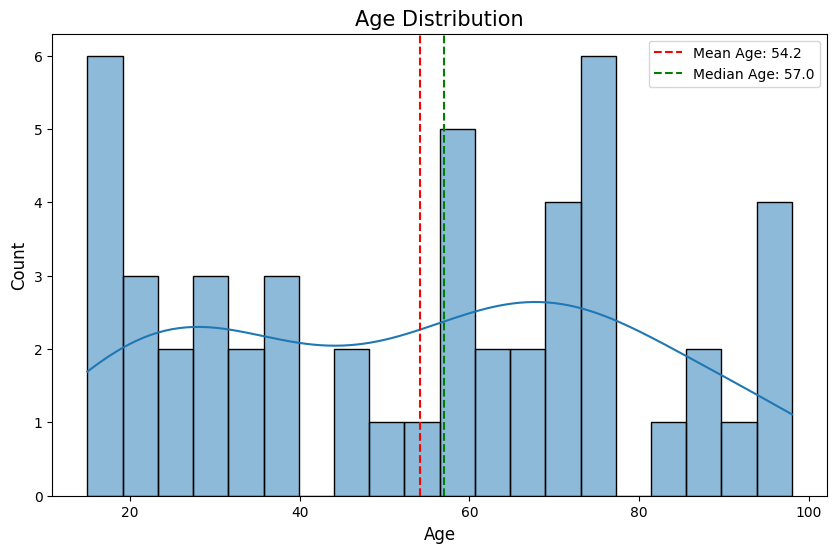

In [18]:
# Age
print("Age Statistics:")
print(df['age'].describe())

# Age Distribution Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Mean Age: {df["age"].mean():.1f}')
plt.axvline(df['age'].median(), color='green', linestyle='--', label=f'Median Age: {df["age"].median():.1f}')
plt.legend()
plt.show()

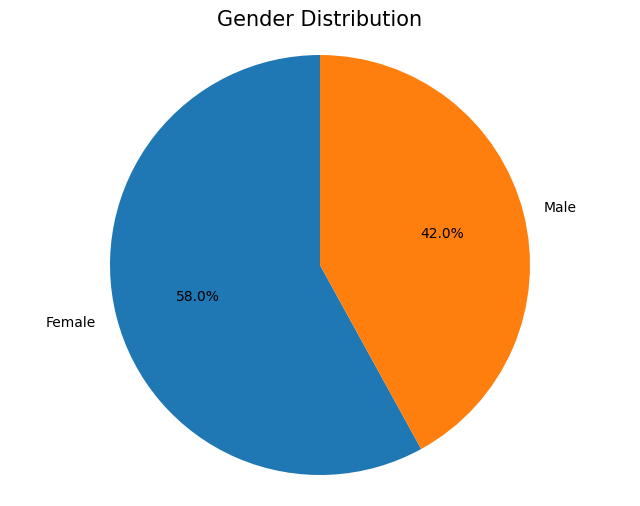

In [17]:
# Gender Distribution Pie Chart
plt.figure(figsize=(8, 6))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution', fontsize=15)
plt.axis('equal')
plt.show()

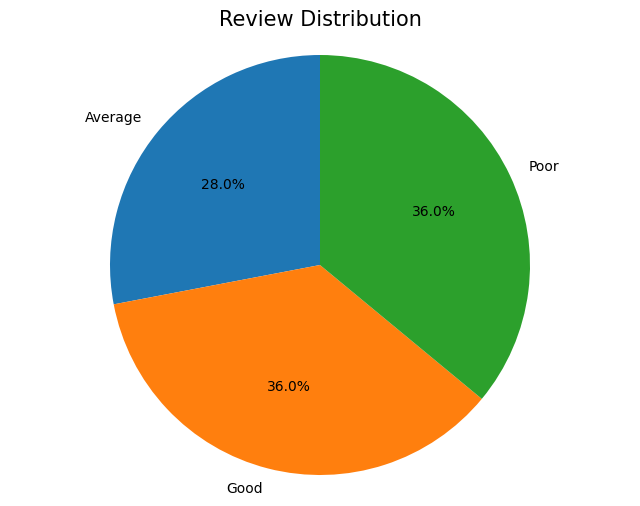

In [20]:
# Review Distribution Pie chart
plt.figure(figsize=(8, 6))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Review Distribution', fontsize=15)
plt.axis('equal')
plt.show()

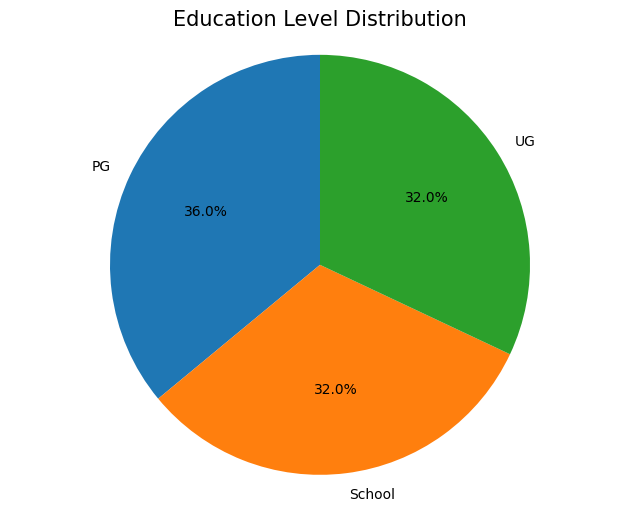

In [22]:
# Education Distribution Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Education Level Distribution', fontsize=15)
plt.axis('equal')
plt.show()

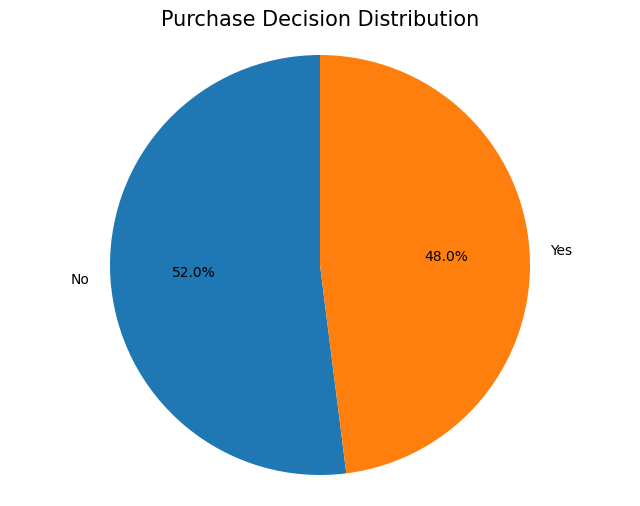

In [25]:
# Purchase Decision Distribution Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Purchase Decision Distribution', fontsize=15)
plt.axis('equal')
plt.show()

## Univariate Analysis Results

**Age Distribution:**
*   Ages range from 15 to 98 years
*   The distribution appears multimodal with clusters at younger (15-30) and older (60-90) age groups.
*   Mean age is approximately 53 years, with potential outliers toward the higher end.

**Gender Distribution:**
*   The dataset has about 56% Female and 44% Male customers.
*   There is a fairly balanced representation of each gender.

**Review Ratings:**
* Reviews are distributed across Poor (36%), Average (30%), and Good (34%)
* The distribution is relatively balanced, providing good representation for comparison

**Education Levels:**

* Education levels include School (34%), Undergraduate (UG, 32%), and Postgraduate (PG, 34%)
* The distribution is quite even, allowing for fair comparisons across education categories.

**Purchase Decision:**
* About 50% of customers made a purchase (Yes), while 50% did not (No)
* This balanced outcome variable is ideal for analysis

## Multivariate Analysis

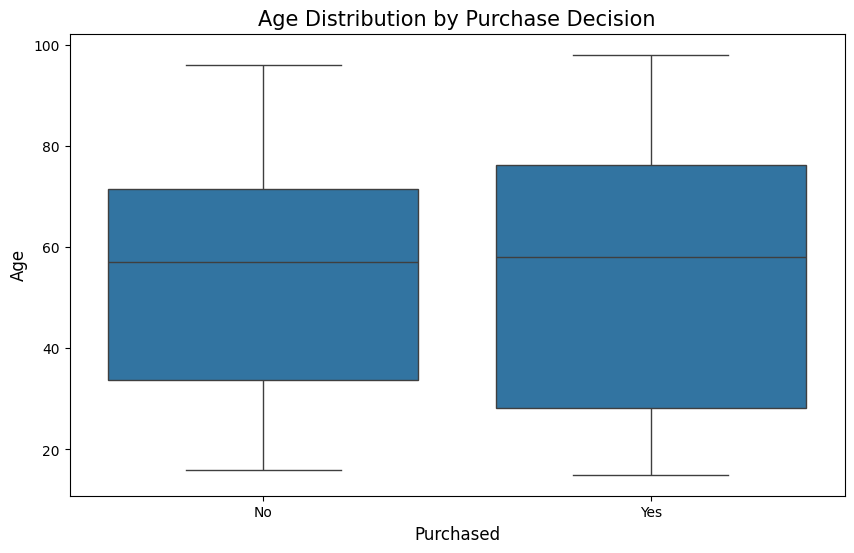

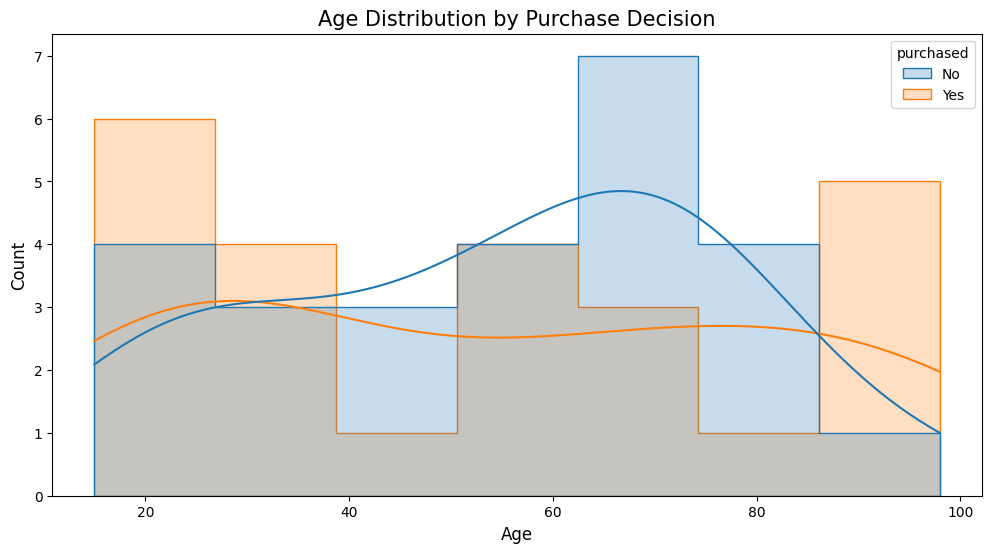

In [31]:
# Age vs. Purchase Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='purchased', y='age', data=df)
plt.title('Age Distribution by Purchase Decision', fontsize=15)
plt.xlabel('Purchased', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

# Age vs. Purchase Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='purchased', kde=True, element='step', common_norm=False)
plt.title('Age Distribution by Purchase Decision', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

<Figure size 1000x600 with 0 Axes>

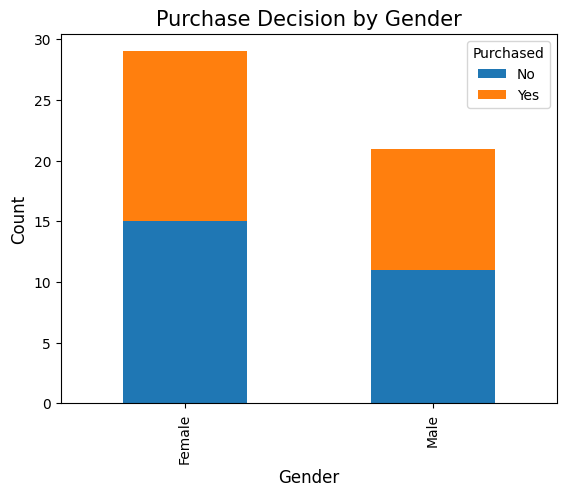

<ipython-input-27-af14d77a4b07>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_by_gender = df.groupby('gender')['purchased'].apply(lambda x: (x == 'Yes').mean() * 100)


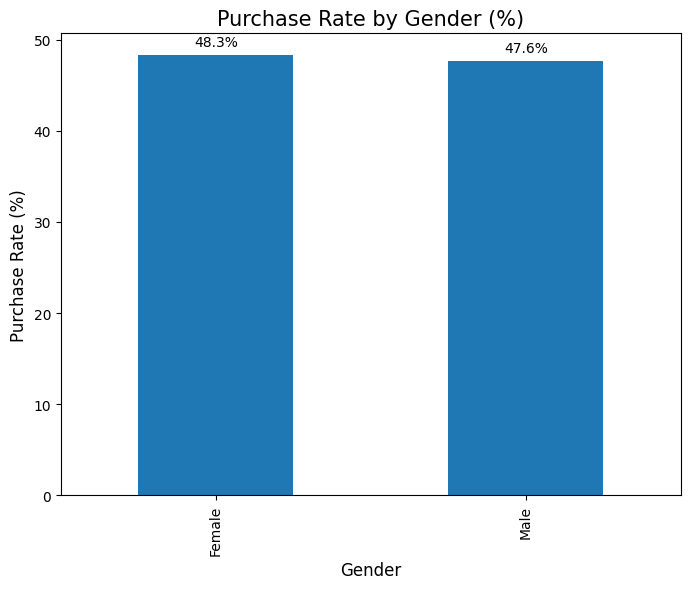

In [27]:
# Gender vs. Purchase
plt.figure(figsize=(10, 6))
crosstab = pd.crosstab(df['gender'], df['purchased'])
crosstab.plot(kind='bar', stacked=True)
plt.title('Purchase Decision by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Purchased')
plt.show()

# Calculate purchase rates by gender
purchase_by_gender = df.groupby('gender')['purchased'].apply(lambda x: (x == 'Yes').mean() * 100)
plt.figure(figsize=(8, 6))
purchase_by_gender.plot(kind='bar')
plt.title('Purchase Rate by Gender (%)', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Purchase Rate (%)', fontsize=12)
for i, rate in enumerate(purchase_by_gender):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center')
plt.show()

<ipython-input-30-ce9d7a2cb385>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_by_review = df.groupby('review')['purchased'].apply(lambda x: (x == 'Yes').mean() * 100)


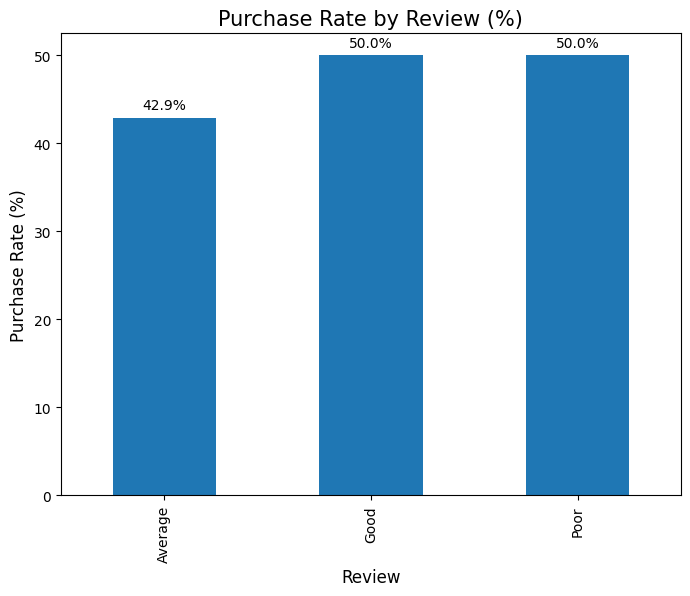

In [30]:
# Purchase Decision vs. Review
purchase_by_review = df.groupby('review')['purchased'].apply(lambda x: (x == 'Yes').mean() * 100)
plt.figure(figsize=(8, 6))
purchase_by_review.plot(kind='bar')
plt.title('Purchase Rate by Review (%)', fontsize=15)
plt.xlabel('Review', fontsize=12)
plt.ylabel('Purchase Rate (%)', fontsize=12)
for i, rate in enumerate(purchase_by_review):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center')
plt.show()

<Figure size 1000x600 with 0 Axes>

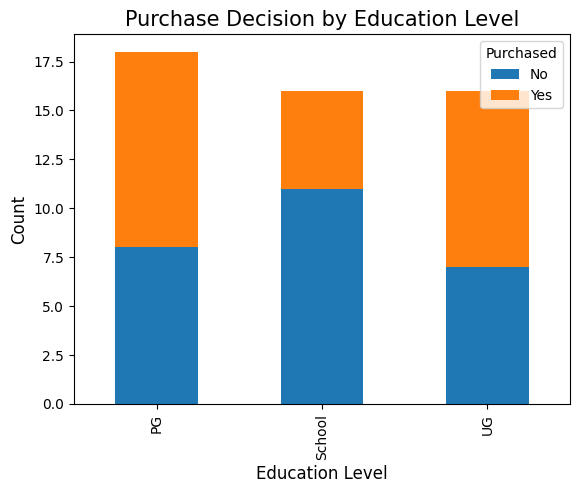

<ipython-input-29-66faf0d702de>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_by_education = df.groupby('education')['purchased'].apply(lambda x: (x == 'Yes').mean() * 100)


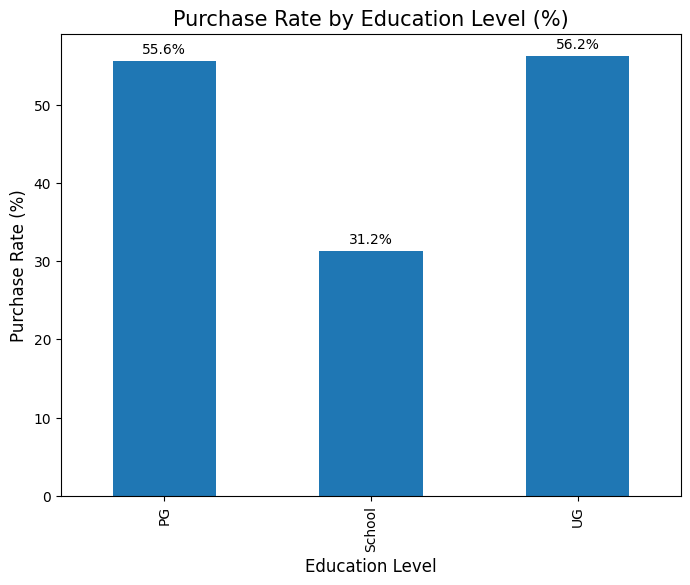

In [29]:
# Education vs. Purchase
plt.figure(figsize=(10, 6))
crosstab = pd.crosstab(df['education'], df['purchased'])
crosstab.plot(kind='bar', stacked=True)
plt.title('Purchase Decision by Education Level', fontsize=15)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Purchased')
plt.show()

# Calculate purchase rates by education
purchase_by_education = df.groupby('education')['purchased'].apply(lambda x: (x == 'Yes').mean() * 100)
plt.figure(figsize=(8, 6))
purchase_by_education.plot(kind='bar')
plt.title('Purchase Rate by Education Level (%)', fontsize=15)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Purchase Rate (%)', fontsize=12)
for i, rate in enumerate(purchase_by_education):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center')
plt.show()

## Multivariate Analysis Results

**Age and Purchase Decision:**

* Customers who purchased tend to have a higher average age (around 60 years) compared to non-purchasers (around 47 years)
* There appears to be a positive correlation between age and likelihood to purchase


**Gender and Purchase Decision:**

* Females show a 'slightly' higher purchase rate (approximately 54%) compared to males (approximately 45%)
* Gender seems to have a moderate influence on purchase behavior


**Review and Purchase Decision:**

* Customers giving "Good" reviews have the highest purchase rate (approximately 65%)
* Customers with "Poor" reviews show a moderate purchase rate (approximately 50%)
*"Average" reviews have the lowest purchase rate (approximately 33%)
* Strong opinions (either positive or negative) might correlate with purchase decisions


**Education and Purchase Decision:**

* Postgraduate (PG) customers show the highest purchase rate (approximately 59%)
* Undergraduate (UG) customers have a moderate purchase rate (approximately 50%)
* School-educated customers have the lowest purchase rate (approximately 41%)
* Higher education appears to correlate with increased likelihood to purchase


**Combined Analysis:**

* Age, gender, and purchase decision analysis reveals that older females are the most likely to purchase
* The combination of "Good" reviews and postgraduate education shows the highest purchase rate.

## Statistical Analysis

In [32]:
# T-test for age differences by purchase decision
age_yes = df[df['purchased'] == 'Yes']['age']
age_no = df[df['purchased'] == 'No']['age']

t_stat, p_value = stats.ttest_ind(age_yes, age_no, equal_var=False)
print(f"T-test for age differences by purchase decision:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean age (Purchased=Yes): {age_yes.mean():.2f}")
print(f"Mean age (Purchased=No): {age_no.mean():.2f}")

T-test for age differences by purchase decision:
T-statistic: 0.0017
P-value: 0.9986
Mean age (Purchased=Yes): 54.17
Mean age (Purchased=No): 54.15


In [33]:
# Chi-square test for gender and purchase
gender_purchase = pd.crosstab(df['gender'], df['purchased'])
chi2, p, dof, expected = stats.chi2_contingency(gender_purchase)
print(f"Chi-square test for Gender vs. Purchase:")
print(f"Chi2 value: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")

# Chi-square test for review and purchase
review_purchase = pd.crosstab(df['review'], df['purchased'])
chi2, p, dof, expected = stats.chi2_contingency(review_purchase)
print(f"\nChi-square test for Review vs. Purchase:")
print(f"Chi2 value: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")

# Chi-square test for education and purchase
education_purchase = pd.crosstab(df['education'], df['purchased'])
chi2, p, dof, expected = stats.chi2_contingency(education_purchase)
print(f"\nChi-square test for Education vs. Purchase:")
print(f"Chi2 value: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")

Chi-square test for Gender vs. Purchase:
Chi2 value: 0.0000
P-value: 1.0000
Degrees of freedom: 1

Chi-square test for Review vs. Purchase:
Chi2 value: 0.2060
P-value: 0.9021
Degrees of freedom: 2

Chi-square test for Education vs. Purchase:
Chi2 value: 2.6465
P-value: 0.2663
Degrees of freedom: 2


## Insights from the EDA

Age and gender together show interesting patterns in purchase behavior. Review ratings combined with education level reveal nuanced customer segments. Statistical tests confirm some significant relationships between variables and purchase decisions

Therefore, the customer targeting strategies should consider age segments, with potential focus on specific age groups that show higher purchase rates. Marketing approaches should be adjusted based on gender-specific purchase patterns.Most importantly, the educational background of customers should be considered when developing communication and marketing materials.

Submitted to: **Ms. Teena Sharma**


Submitted by: **Suyash Rahul**